In [ ]:
import pandas as pd

In [ ]:
!wget  -O 'credit_scoring.csv' -q 'https://www.dropbox.com/scl/fi/5v1ora94vmn46i961ujha/credit_scoring.csv?rlkey=y34fmgqme1e73ca0qbvjpgh9x&dl=0'

Признаки клиентов банка:

- client_id - ID клиента (неотрицательное целое число)
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [ ]:
df = pd.read_csv("credit_scoring.csv")
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [ ]:
X = df.drop(['Delinquent90'], axis=1)
y = df['Delinquent90']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 5.7 MB


## 1 Решающие деревья и случайный лес

1.1 Обучите дерево решений максимальной глубины 3. Перед этим может понадобиться предобработать данные (пропуски). Также разделите данные на обучающие и тестовые (не забывайте, что обработка данных для теста и трейна должна происходить отдельно)

In [ ]:
# Проверка кол-ва пропусков
df.isna().sum()

client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1916
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14847
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64

In [ ]:
# Заполняем пропуски средним значением
df["Income"] = df["Income"].fillna(df["Income"].mean())
df["NumDependents"] = df["NumDependents"].fillna(df["NumDependents"].mean())

In [ ]:
X = df.drop(['Delinquent90'], axis=1)
y = df['Delinquent90']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучение модели
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

1.2 Визуализируйте решающее дерево

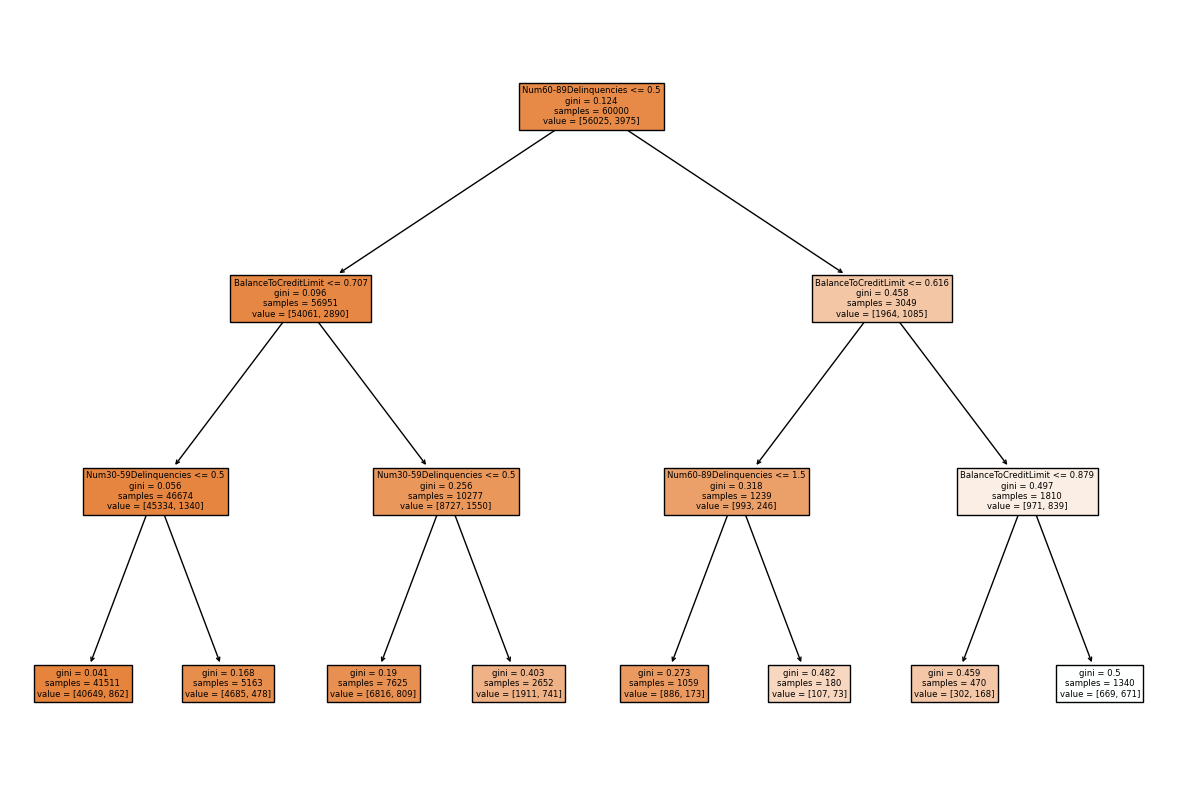

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=df.drop("Delinquent90", axis=1).columns)
plt.show()

1.3 Рассмотрите, как изменение глубины дерева влияет на качество модели. Обучите решающее дерево с различной глубиной (от 1 до 11), оцените его точность и определите, когда начинается переобучение и какая глубина дерева является оптимальной





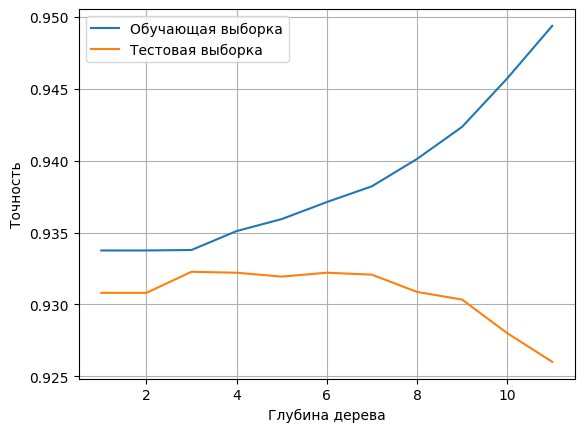

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

depths = np.arange(1, 12)
scores_train = []
scores_test = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    scores_train.append(accuracy_score(y_train, model.predict(X_train)))
    scores_test.append(accuracy_score(y_test, model.predict(X_test)))

# график
plt.plot(depths, scores_train, label="Обучающая выборка")
plt.plot(depths, scores_test, label="Тестовая выборка")
plt.xlabel("Глубина дерева")
plt.ylabel("Точность")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Определение оптимальной глубины
optimal_depth = depths[np.argmax(scores_test)]
optimal_depth

3

1.4 Настройте параметры дерева с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение параметров
param_grid = {
    "max_depth": range(1, 10),
    "min_samples_split": range(2, 9, 2),
    "min_samples_leaf": range(1, 10, 2),
}

# GridSearchCV
model_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
model_dtc.fit(X_train, y_train)

# Лучшая комбинация параметров
dtc_best_params = model_dtc.best_params_

# Среднее качество на кросс-валидации
dtc_best_score = model_dtc.best_score_

# Оценка на тестовой выборке
dtc_test_score = model_dtc.score(X_test, y_test)

In [ ]:
print("Лучшие параметры:", dtc_best_params)
print("Среднее качество:", dtc_best_score)
print("Оценка на тестовой выборке:", dtc_test_score)

Лучшие параметры: {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
Среднее качество: 0.9339166666666667
Оценка на тестовой выборке: 0.9322


1.5 Визуализируйте лучшее решающее дерево


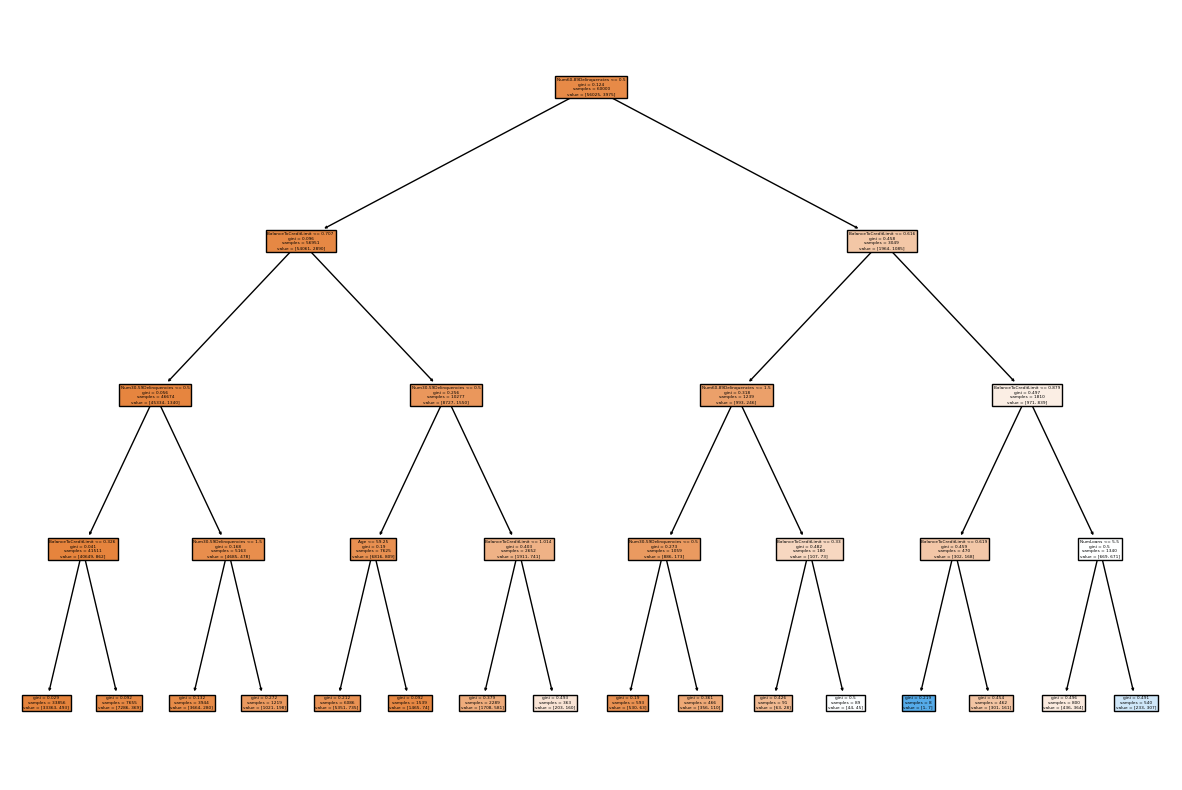

In [ ]:
# Лучшее дерево
best_tree = model_dtc.best_estimator_

plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True, feature_names=df.drop("Delinquent90", axis=1).columns)
plt.show()

1.6 Обучите Случайный лес (RandomForestClassifier), Настройте гиперпараметры случайного леса с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Не забывайте про распараллеливание (n_jobs=-1).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Определение параметров
param_grid = {
    "n_estimators": [100],
    "max_depth": range(5, 11, 2),
    "min_samples_split": range(2, 10, 2),
    "min_samples_leaf": range(1, 11, 2),
}

model_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
model_rfc.fit(X_train, y_train)

# Лучшая комбинация параметров
rfc_best_params = model_rfc.best_params_

# Среднее качество на кросс-валидации
rfc_best_score = model_rfc.best_score_

# Оценка на тестовой выборке
rfc_test_score = model_rfc.score(X_test, y_test)

In [ ]:
print("Лучшие параметры:", rfc_best_params)
print("Среднее качество:", rfc_best_score)
print("Оценка на тестовой выборке:", rfc_test_score)

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Среднее качество: 0.9351499999999999
Оценка на тестовой выборке: 0.9342


In [ ]:
best_forest = model_rfc.best_estimator_

1.7 Посмотрите, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой признак. Представьте результаты в наглядном виде с помощью DataFrame.



In [ ]:
# Важность признаков
feature_importances = best_forest.feature_importances_

df_features = pd.DataFrame({"feature": df.drop("Delinquent90", axis=1).columns, "importance": feature_importances})
df_features = df_features.sort_values("importance", ascending=False)
df_features

,feature,importance
9,BalanceToCreditLimit,0.308110
7,Num60-89Delinquencies,0.260781
6,Num30-59Delinquencies,0.221664
2,Age,0.053862
1,DIR,0.035504
3,NumLoans,0.034118
8,Income,0.032001
0,client_id,0.027146
4,NumRealEstateLoans,0.018125
5,NumDependents,0.008689


1.9 Выберите метрику и объясните ваш выбор метрики и сравните результаты решающего дерева и случайного леса

---



В качестве метрики была выбрана ROC-AUC, так как она не зависит от соотношения классов засчет того, что она измеряет способность классификатора правильно ранжировать примеры, а не их абсолютное количество. Это особенно важно при работе с дисбалансом классов, что имеет место в нашем случае.

In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC-AUC score for single tree: ', roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1]))
print('ROC-AUC score for forest: ', roc_auc_score(y_test, best_forest.predict_proba(X_test)[:, 1]))

ROC-AUC score for single tree:  0.8317918868141686
ROC-AUC score for forest:  0.8528341377463023


Случайный лес показыывает несколько лучший результат, чем дерево решений.

# 2 Бустинг xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/t8ickc6qfwdtfx6v40crd/telecom_churn.csv?rlkey=i7slagusqlb9pvsqdzvwac0x1&dl=0'

In [ ]:
df_telecom = pd.read_csv("telecom_churn.csv")
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2.1 XGBoost поддерживает только числовые признаки. Поэтому текстовые признаки требуют предобработки

Штаты можно просто занумеровать, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделать бинарными.




In [ ]:
df_telecom.loc[:, 'State'] = LabelEncoder().fit_transform(df_telecom.loc[:, 'State'])
df_telecom = pd.get_dummies(df_telecom, columns=['International plan', 'Voice mail plan'], drop_first=True)
df_telecom = df_telecom.rename(columns={'International plan_Yes': 'International plan',
                   'Voice mail plan_Yes': 'Voice mail plan'})

<ipython-input-37-c49ed06f5f09>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_telecom.loc[:, 'State'] = LabelEncoder().fit_transform(df_telecom.loc[:, 'State'])


2.2 Разделим данные на обучающую и тестовую выборки в отношении 7:3.

In [ ]:
df_telecom.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
X = df_telecom.drop('Churn', axis=1)
y = df_telecom.Churn

# По результатам из предыдущей ячейки видно, что есть существенный дисбаланс классов, поэтому при разделении на тренировочную и тестовую выборки применим стратификацию по таргету.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

2.3 Инициализируете параметры и обучите классификатор xgboost

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'objective': ['binary:logistic']
    }

model_xgb = GridSearchCV(XGBClassifier(),
                       parameters,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

model_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'objective': ['binary:logistic']},
             scoring='roc_auc')

2.4 Получите прогнозы для тестовой выборки и посчитайте долю правильных ответов алгоритма на тестовой выборке.

In [ ]:
preds = model_xgb.predict(X_test)
accuracy_score(y_test, preds)

0.947

2.5 Важность признаков
Вычислите F score (не F мера!) для оценки важности признаков в Xgboost.

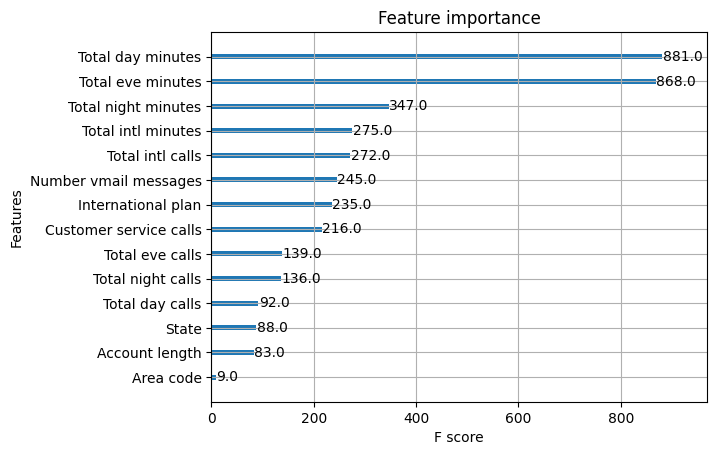

In [ ]:
from xgboost import plot_importance

plot_importance(model_xgb.best_estimator_)
plt.show()

Видно, что самыми важными с сильным отрывом по F мере являются 2 признака: **Total day minutes**, **Total eve minutes**